***Congressional Voting Dataset***

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df_vote=pd.read_csv('CongressionalVotingID.shuf.lrn.csv')
df_vote = df_vote.applymap(lambda x: 1 if x == 'y' else 0 if x == 'n' else x)
df_vote.tail()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
213,106,democrat,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1
214,271,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
215,275,republican,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
216,354,republican,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1
217,324,democrat,1,1,1,0,1,1,0,1,unknown,1,0,0,1,1,0,unknown


In [37]:
# filter the DataFrame by class == democrat
df_democrat = df_vote[df_vote['class'] == 'democrat']
unknown_count_d = df_democrat.apply(lambda x: x.eq('unknown').sum()).sum()
print(f"{round(100*unknown_count_d/((df_democrat.shape[0]-2)*(df_democrat.shape[0]-2)))} percent of the democratic votes are unknown ")



1 percent of the democratic votes are unknown 


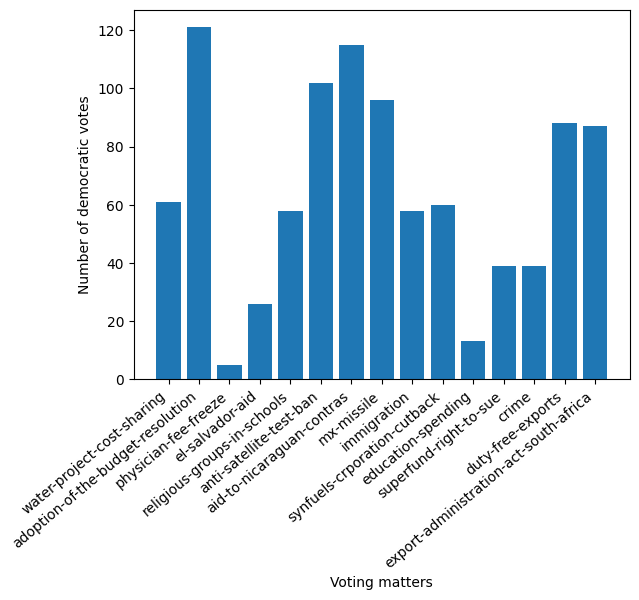

In [38]:
# plot a histogram of column1 for democrats
#df_democrat=df_democrat.replace('unknown',0)
df_democrat_T=df_democrat.transpose()
df_democrat_T=df_democrat_T[3:]
df_democrat_T= df_democrat_T.replace('unknown',pd.NA)
df_democrat_sum=df_democrat_T.sum(axis=1, skipna=True)
plt.bar(x=df_democrat_sum.index,height=df_democrat_sum)
plt.xticks(df_democrat_sum.index, rotation=40,horizontalalignment='right')
plt.xlabel('Voting matters')
plt.ylabel('Number of democratic votes')

# Display plot
plt.show()

1 percent of the republican votes are unknown 


Text(0, 0.5, 'Number of democratic votes')

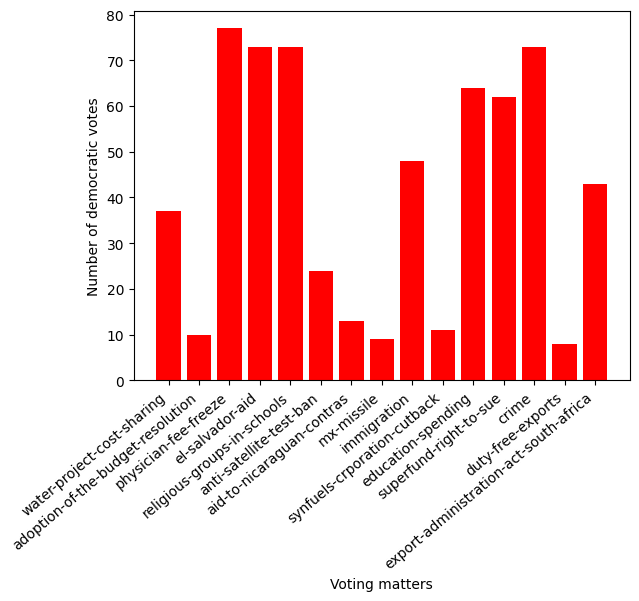

In [39]:
# filter the DataFrame by class == republican
df_republican = df_vote[df_vote['class'] == 'republican']
unknown_count_d = df_republican.apply(lambda x: x.eq('unknown').sum()).sum()
print(f"{round(100*unknown_count_d/((df_republican.shape[0]-2)*(df_republican.shape[0]-2)))} percent of the republican votes are unknown ")

# Bar plot for republicans
df_republican_T=df_republican.transpose()
df_republican_T=df_republican_T[3:]
df_republican_T= df_republican_T.replace('unknown',pd.NA)
df_republican_sum=df_republican_T.sum(axis=1, skipna=True)
plt.bar(x=df_republican_sum.index,height=df_republican_sum,color='red')
plt.xticks(df_republican_sum.index, rotation=40,horizontalalignment='right')
plt.xlabel('Voting matters')
plt.ylabel('Number of democratic votes')

**Plot the difference between the sum of republican and democratic votes**

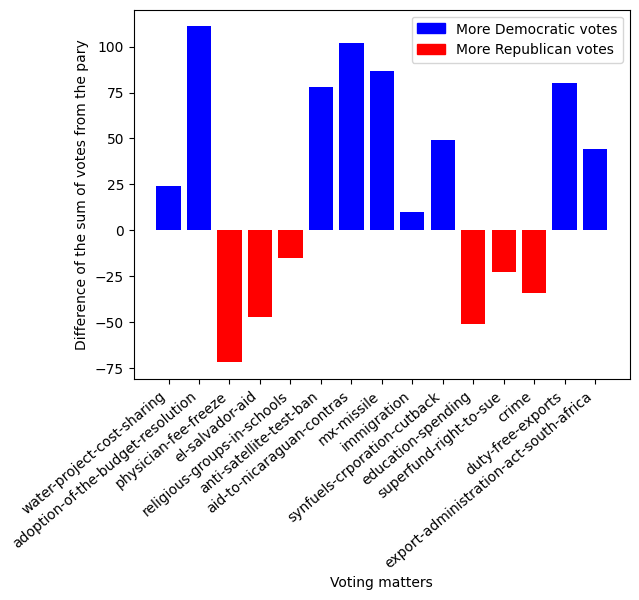

In [40]:
#Define colors
val=df_democrat_sum-df_republican_sum
colors = ['blue' if val >= 0 else 'red' for val in val]

plt.bar(x=df_republican_sum.index,height=df_democrat_sum-df_republican_sum,color=colors)
plt.xticks(df_republican_sum.index, rotation=40,horizontalalignment='right')
plt.xlabel('Voting matters')
plt.ylabel('Difference of the sum of votes from the pary')
# specify legend labels
legend_labels = {'blue': 'More Democratic votes', 'red': 'More Republican votes'}

# add legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in legend_labels.keys()],
           labels=[legend_labels[color] for color in legend_labels.keys()])


**Plot out three most distinguishing isses for democrats and for republicans**

In [41]:

n=0
for i in val.nlargest(3).index.values:
    n+=1
    print(f"No. {n} most distinguishing issues for democrats is {val.nlargest(3).index.values[n-1]}")
print()

n=0
for i in val.nlargest(3).index.values:
    n+=1
    print(f"No. {n} most distinguishing issues for democrats is {val.nsmallest(3).index.values[n-1]}")





No. 1 most distinguishing issues for democrats is adoption-of-the-budget-resolution
No. 2 most distinguishing issues for democrats is aid-to-nicaraguan-contras
No. 3 most distinguishing issues for democrats is mx-missile

No. 1 most distinguishing issues for democrats is physician-fee-freeze
No. 2 most distinguishing issues for democrats is education-spending
No. 3 most distinguishing issues for democrats is el-salvador-aid


**Create a training and validation data**

In [42]:
#Substitute all `unknwon` to 0, as to say that no vote could be recorded
if df_democrat.applymap(lambda x: 'unknown' in str(x)).any().any():
    df_democrat=df_democrat.replace('unknown',0)
if df_republican.applymap(lambda x: 'unknown' in str(x)).any().any():
    df_republican=df_republican.replace('unknown',0)
#df_democrat.iloc[0:len(df_democrat)*7]

In [43]:
df_democrat.iloc[0:int(len(df_democrat)*0.7)]
df_republican.iloc[0:int(len(df_republican)*0.7)]
train=pd.concat([df_democrat.iloc[0:int(len(df_democrat)*0.7)],df_republican.iloc[0:int(len(df_republican)*0.7)]],axis=0)
train
y_train=train['class']
x_train=train.iloc[:,2:]

train

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
1,140,democrat,1,0,1,0,0,1,1,1,1,0,0,0,0,0,1,1
2,383,democrat,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0
3,201,democrat,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1
6,308,democrat,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0
7,420,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,296,republican,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0
146,56,republican,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,0
148,52,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
149,68,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0


In [44]:
val=pd.concat([df_democrat.iloc[int(len(df_democrat)*0.7): int(len(df_democrat))],df_republican.iloc[int(len(df_republican)*0.7):int(len(df_republican))]],axis=0)
y_val=val['class']
x_val=val.iloc[:,2:]
val

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
151,289,democrat,1,1,1,0,1,1,0,1,0,1,1,0,1,1,1,1
153,213,democrat,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1
154,386,democrat,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0
155,129,democrat,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1
156,186,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,127,republican,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0
201,314,republican,0,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1
211,90,republican,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0
215,275,republican,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1


In [45]:
#x_train.shape
y_train.shape[0]==x_train.shape[0]


True

**kNN**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [47]:

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train )

KNeighborsClassifier()

In [48]:
y_pred=knn_model.predict(x_val)
y_pred
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

    democrat       0.93      0.98      0.95        42
  republican       0.96      0.88      0.92        25

    accuracy                           0.94        67
   macro avg       0.94      0.93      0.94        67
weighted avg       0.94      0.94      0.94        67



**Naive Bayers**

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [51]:
y_pred= nb_model.predict(x_val)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

    democrat       0.95      0.98      0.96        41
  republican       0.96      0.92      0.94        26

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



**Log regression**

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lg_model=LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [54]:
y_pred=lg_model.predict(x_val)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

    democrat       0.98      0.95      0.96        43
  republican       0.92      0.96      0.94        24

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



**Neural Network**

In [55]:
import tensorflow as tf

In [56]:
#Convert democrat to 1 and republican to 0
y_train_nn=y_train.replace('democrat',float(1))
y_train_nn=y_train_nn.replace('republican',float(0))
y_val_nn=y_val.replace('democrat',float(1))
y_val_nn=y_val_nn.replace('republican',float(0))


In [57]:
y_train_nn.shape[0]==x_train.shape[0]
y_val_nn.shape[0]==y_val.shape[0]
#x_train[:-1

True

In [58]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    #plt.show()

    
    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracay')
    ax2.legend()
    ax2.grid(True)
    plt.show()

In [59]:
def train_model(x_train,y_train, num_nodes, dropout_prob,lr, batch_size, epochs):
    nn_model=tf.keras.Sequential([tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(16,)),
                              tf.keras.layers.Dropout(dropout_prob),
                             tf.keras.layers.Dense(num_nodes, activation='relu'),
                             tf.keras.layers.Dropout(dropout_prob),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",metrics=['accuracy'])

    #x_train=x_train.astype(float)

    history = nn_model.fit(x_train,y_train_nn, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plot_history(history)
    return nn_model, history

c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


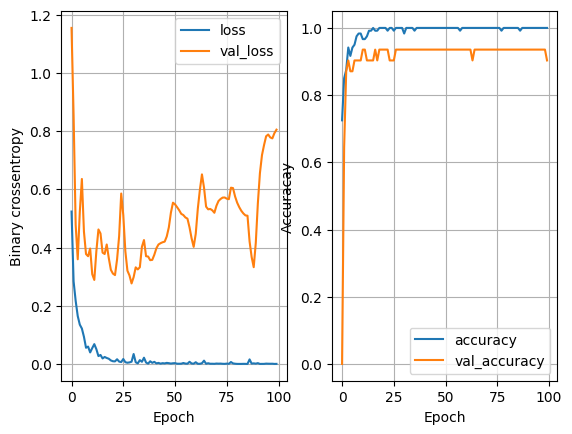

3/3 [==============================] - 0s 0s/step - loss: 0.4918 - accuracy: 0.9104


[0.491779625415802, 0.9104477763175964]

In [60]:
nn_model, history= train_model(x_train,y_train_nn,num_nodes=32,dropout_prob=0.2,lr=0.01,batch_size=32,epochs=100)
val_loss=nn_model.evaluate(x_val,y_val_nn)
val_loss

16 node, 0 dropout_prob, 0.01 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


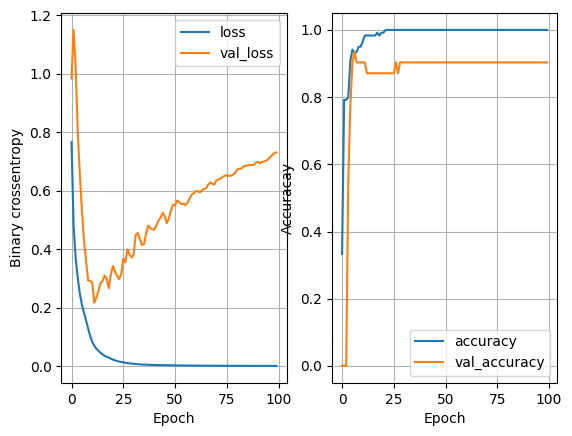

3/3 [==============================] - 0s 0s/step - loss: 0.1766 - accuracy: 0.9403
16 node, 0 dropout_prob, 0.01 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


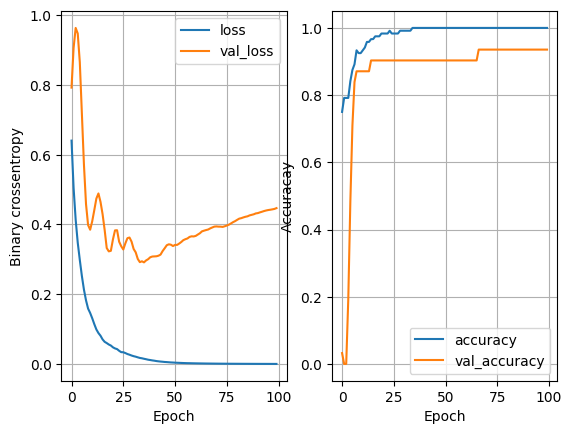

3/3 [==============================] - 0s 0s/step - loss: 0.2976 - accuracy: 0.9254
16 node, 0 dropout_prob, 0.001 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


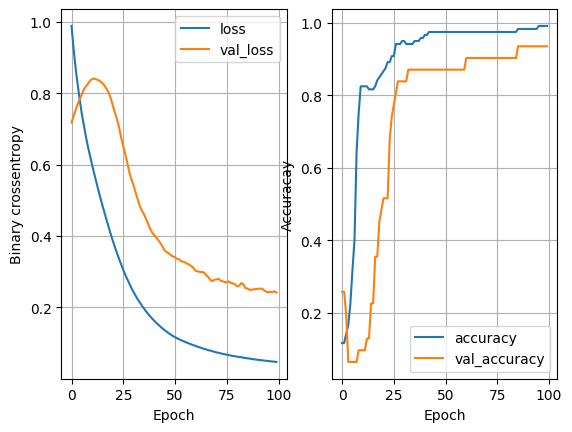

3/3 [==============================] - 0s 4ms/step - loss: 0.1468 - accuracy: 0.9104
16 node, 0 dropout_prob, 0.001 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


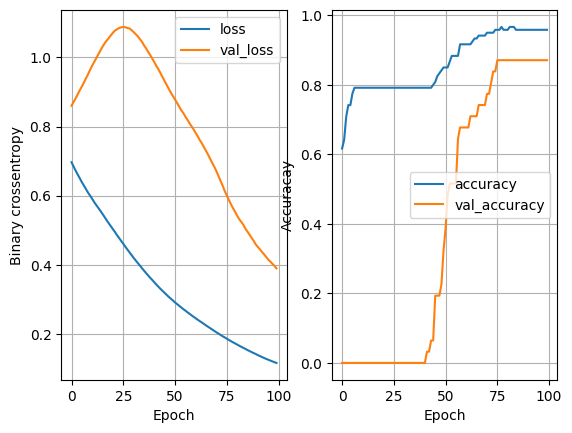

3/3 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9254
16 node, 0.1 dropout_prob, 0.01 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


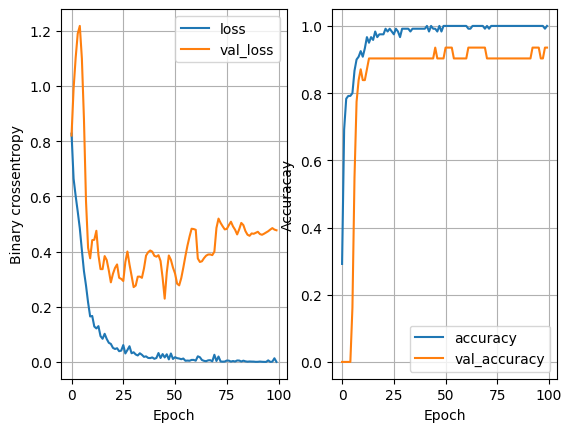

3/3 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.9403
16 node, 0.1 dropout_prob, 0.01 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


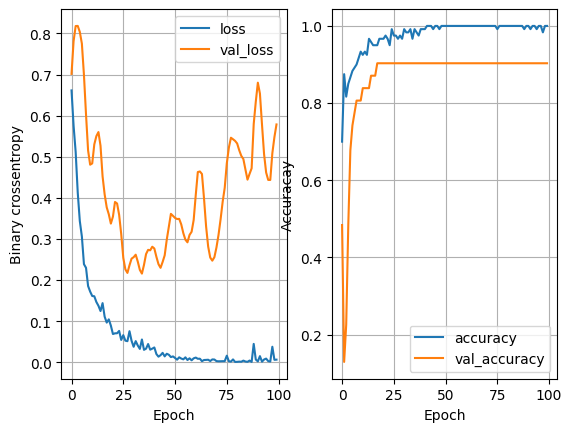

3/3 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9254
16 node, 0.1 dropout_prob, 0.001 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


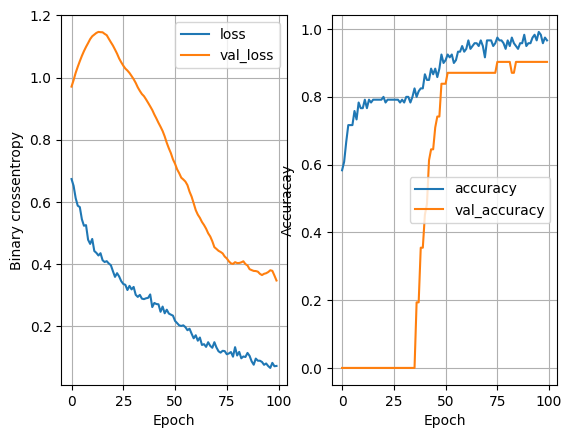

3/3 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9254
16 node, 0.1 dropout_prob, 0.001 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


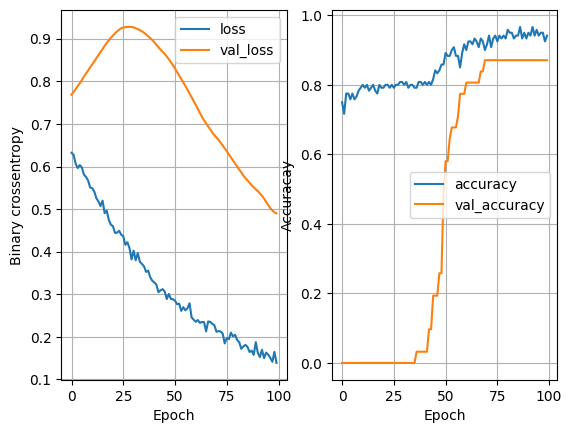

3/3 [==============================] - 0s 4ms/step - loss: 0.2035 - accuracy: 0.9403
32 node, 0 dropout_prob, 0.01 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


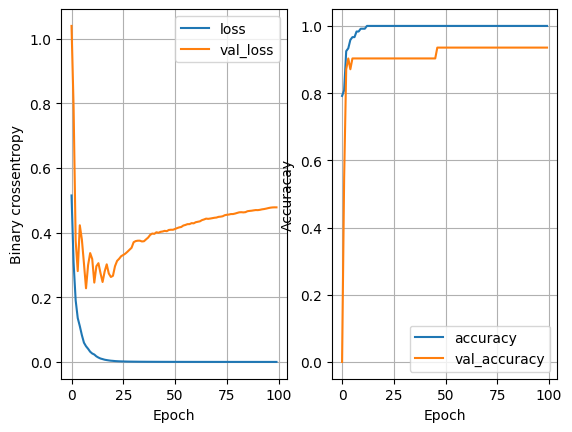

3/3 [==============================] - 0s 4ms/step - loss: 0.3463 - accuracy: 0.9254
32 node, 0 dropout_prob, 0.01 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


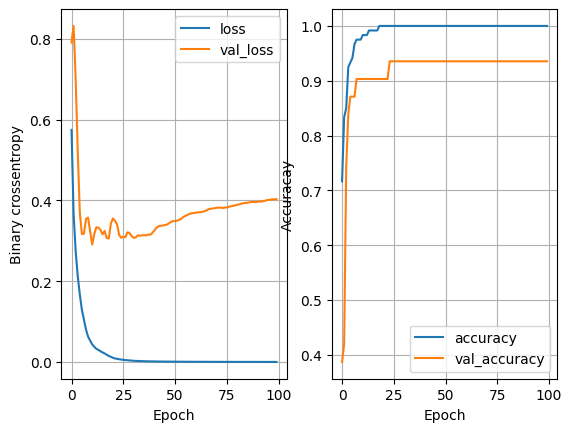

3/3 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.9254
32 node, 0 dropout_prob, 0.001 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


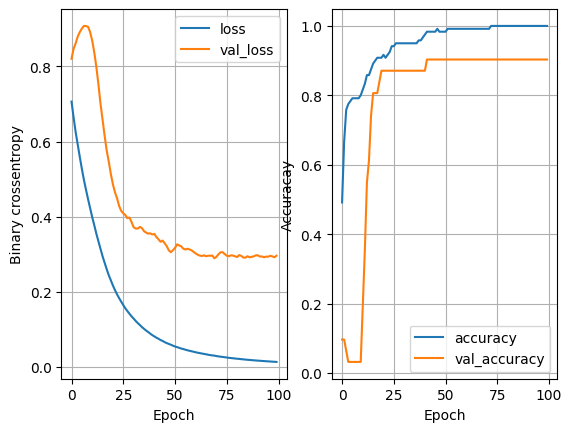

3/3 [==============================] - 0s 4ms/step - loss: 0.1698 - accuracy: 0.9104
32 node, 0 dropout_prob, 0.001 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


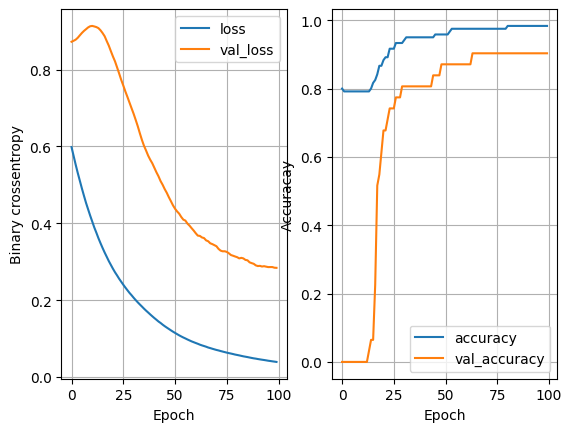

3/3 [==============================] - 0s 4ms/step - loss: 0.1407 - accuracy: 0.9104
32 node, 0.1 dropout_prob, 0.01 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


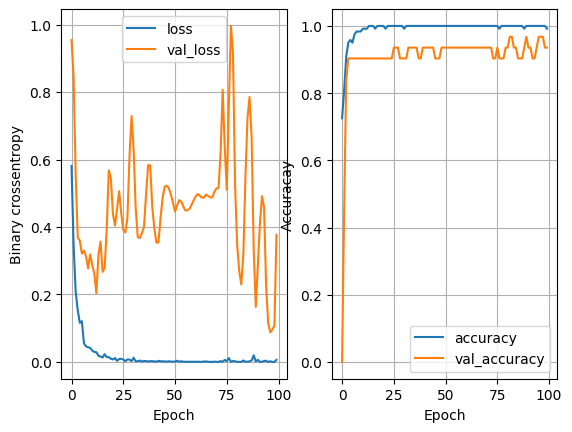

3/3 [==============================] - 0s 0s/step - loss: 0.3523 - accuracy: 0.9403
32 node, 0.1 dropout_prob, 0.01 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


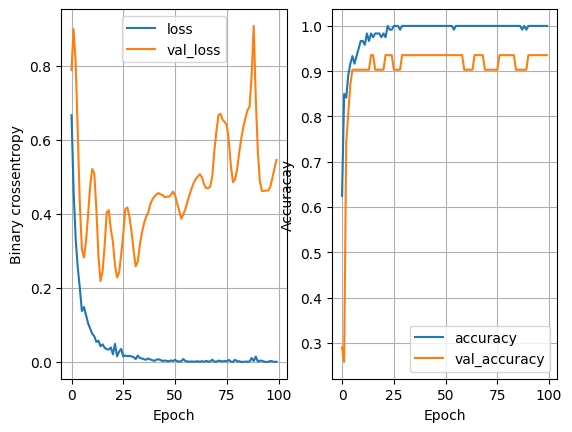

3/3 [==============================] - 0s 0s/step - loss: 0.2976 - accuracy: 0.9254
32 node, 0.1 dropout_prob, 0.001 lr, 32 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


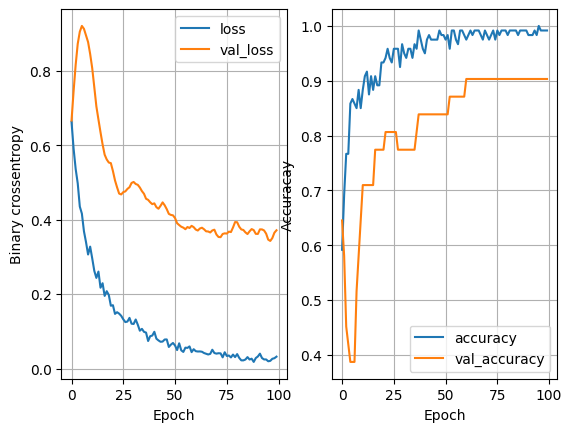

3/3 [==============================] - 0s 4ms/step - loss: 0.2107 - accuracy: 0.9254
32 node, 0.1 dropout_prob, 0.001 lr, 64 batch_size


c:\Users\awtfh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


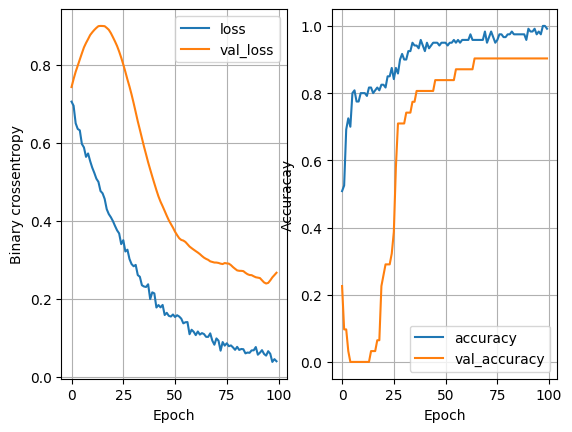

3/3 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9104
The best model is <keras.engine.sequential.Sequential object at 0x000002376B1C40D0> with the val_loss of 0.12864474952220917
32 node, 0.1 dropout_prob, 0.001 lr, 64 batch_size


In [61]:
least_val_loss = float('inf')
least_val_model = None
epochs=100
string=None
for num_nodes in [16,32]:
    for dropout_prob in [0,0.1,]:
        for lr in [0.01 , 0.001]:
            for batch_size in [32, 64]:
                print(f"{num_nodes} node, {dropout_prob} dropout_prob, {lr} lr, {batch_size} batch_size")
                nn_model, history= train_model(x_train,y_train, num_nodes, dropout_prob,lr, batch_size, epochs)
                #plot_history(history)
                val_loss=nn_model.evaluate(x_val,y_val_nn)[0]
                if val_loss<least_val_loss:
                    least_val_loss=val_loss
                    least_val_model=nn_model
                    string=f"{num_nodes} node, {dropout_prob} dropout_prob, {lr} lr, {batch_size} batch_size"
print(f"The best model is {least_val_model} with the val_loss of {least_val_loss}")
print(string)

In [62]:
y_pred=least_val_model.predict(x_val)
y_pred=(y_pred>0.5).astype(int).reshape(-1)
y_pred


print(classification_report(y_val_nn,y_pred))

3/3 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87        25
         1.0       0.89      0.98      0.93        42

    accuracy                           0.91        67
   macro avg       0.92      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67



**Random Forst**

In [66]:
#Import everything necessary
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [67]:
rfc = RandomForestClassifier(n_estimators=100, random_state=26)
rfc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(x_val)

# Evaluate the model
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

    democrat       1.00      0.95      0.98        44
  republican       0.92      1.00      0.96        23

    accuracy                           0.97        67
   macro avg       0.96      0.98      0.97        67
weighted avg       0.97      0.97      0.97        67



**Confusion Matrix**

In [68]:
import seaborn as sns

In [85]:
df_vote
df_vote_binary=df_vote.replace("republican",0)
df_vote_binary=df_vote_binary.replace("democrat",1)
df_vote_binary=df_vote_binary.replace("unknown",0)
df_vote_binary
df_democrat_sum

water-project-cost-sharing                 61.0
adoption-of-the-budget-resolution         121.0
physician-fee-freeze                        5.0
el-salvador-aid                            26.0
religious-groups-in-schools                58.0
anti-satellite-test-ban                   102.0
aid-to-nicaraguan-contras                 115.0
mx-missile                                 96.0
immigration                                58.0
synfuels-crporation-cutback                60.0
education-spending                         13.0
superfund-right-to-sue                     39.0
crime                                      39.0
duty-free-exports                          88.0
export-administration-act-south-africa     87.0
dtype: float64

In [86]:

#Plot confusion matrix
sns.heatmap(df_democrat_sum, annot=False, cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (15, 1) and (15,))